<a href="https://colab.research.google.com/github/LeadShadow/hw10_data_science/blob/main/HW10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist

from keras.optimizers import Adam, RMSprop

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras import optimizers
from keras import losses
from keras import metrics

from keras.layers.regularization.dropout import Dropout
from keras.backend import dropout
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
print('Train: X = ', x_train.shape)
print('Test: X = ', x_test.shape)

Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


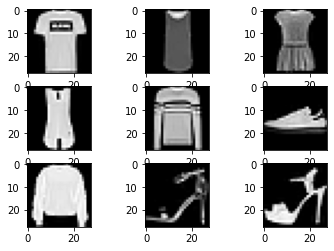

In [ ]:
for i in range(1, 10):
	plt.subplot(3, 3, i)
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print(x_train.shape)

(60000, 28, 28, 1)


In [ ]:
model = Sequential([
    Conv2D(64, (5, 5), padding="same",
					activation="relu",
					input_shape=(28, 28, 1)),

    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (5, 5), padding="same",
					activation="relu"),

    MaxPooling2D(pool_size=(2, 2)),
	  Conv2D(256, (5, 5), padding="same",
					activation="relu"),
	
	  MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu', name = 'hidden_1'),
		Dropout(0.5),

    Dense(10, activation='softmax', name = 'output')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

In [ ]:
history = model.fit(
	x_train.astype(np.float32), y_train.astype(np.float32),
	epochs=22,
	steps_per_epoch=70,
	validation_split=0.33
)

Epoch 1/22
70/70 [==============================] - 416s 6s/step - loss: 2.1159 - sparse_categorical_accuracy: 0.6768 - val_loss: 0.4439 - val_sparse_categorical_accuracy: 0.8344
Epoch 2/22
70/70 [==============================] - 377s 5s/step - loss: 0.4317 - sparse_categorical_accuracy: 0.8493 - val_loss: 0.3330 - val_sparse_categorical_accuracy: 0.8779
Epoch 3/22
70/70 [==============================] - 416s 6s/step - loss: 0.3601 - sparse_categorical_accuracy: 0.8713 - val_loss: 0.3171 - val_sparse_categorical_accuracy: 0.8841
Epoch 4/22
70/70 [==============================] - 376s 5s/step - loss: 0.3203 - sparse_categorical_accuracy: 0.8845 - val_loss: 0.3019 - val_sparse_categorical_accuracy: 0.8889
Epoch 5/22
70/70 [==============================] - 375s 5s/step - loss: 0.2921 - sparse_categorical_accuracy: 0.8944 - val_loss: 0.2820 - val_sparse_categorical_accuracy: 0.8950
Epoch 6/22
70/70 [==============================] - 378s 5s/step - loss: 0.2643 - sparse_categorical_accu

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 24s 77ms/step - loss: 0.3438 - sparse_categorical_accuracy: 0.9135
Test accuracy: 0.9135000109672546


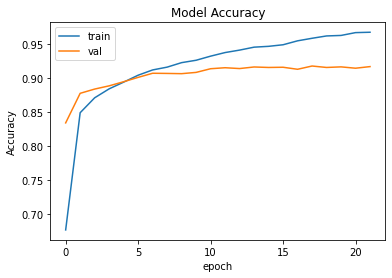

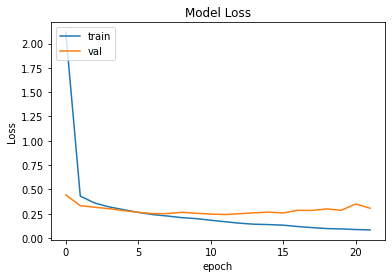

In [ ]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Loss vs Epoch plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save_weights('./model_w.h5', overwrite=True)
model.save("my_model_3")